### Linear regression using Deep neural network

In [1]:
#Importing the pandas for data processing and numpy for numerical computing
import numpy as np
import pandas as pd

In [2]:
# Importing the Boston Housing dataset from the sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
#Converting the data into pandas dataframe
data = pd.DataFrame(boston.data)

### First look at the dataset

In [4]:
#First look at the data
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names

In [6]:
#Adding the target variable to the dataset
data['PRICE'] = boston.target 

In [7]:
#Looking at the data with names and target variable
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#Shape of the data
print(data.shape)

(506, 14)


In [9]:
#Checking the null values in the dataset
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

No null values in the dataset, no missing value treatement needed

In [10]:
#Checking the statistics of the data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


This is sometimes very useful, for example if you look at the CRIM the max is 88.97 and 75% of the value is below 3.677083 and mean is 3.613524 so it means the max values is actually an outlier or there are outliers present in the column

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<a id = 'visual'></a>
# Visualisation

C:\Users\ADITYA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

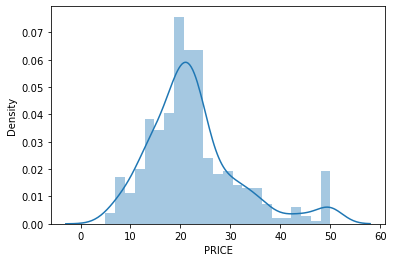

In [12]:
#checking the distribution of the target variable
import seaborn as sns
sns.distplot(data.PRICE)

The distribution seems normal, has not be the data normal we would have perform log transformation or took to square root of the data to make the data normal. Normal distribution is need for the machine learning for better predictiblity of the model

C:\Users\ADITYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRICE'>

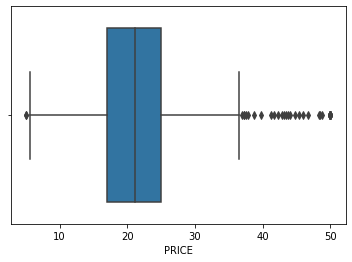

In [13]:
#Distribution using box plot
sns.boxplot(data.PRICE)

<a id = 'corr'></a>
### Checking the correlation of the independent feature with the dependent feature

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.An intelligent correlation analysis can lead to a greater understanding of your data

In [14]:
#checking Correlation of the data 
correlation = data.corr()
correlation.loc['PRICE']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

<AxesSubplot:>

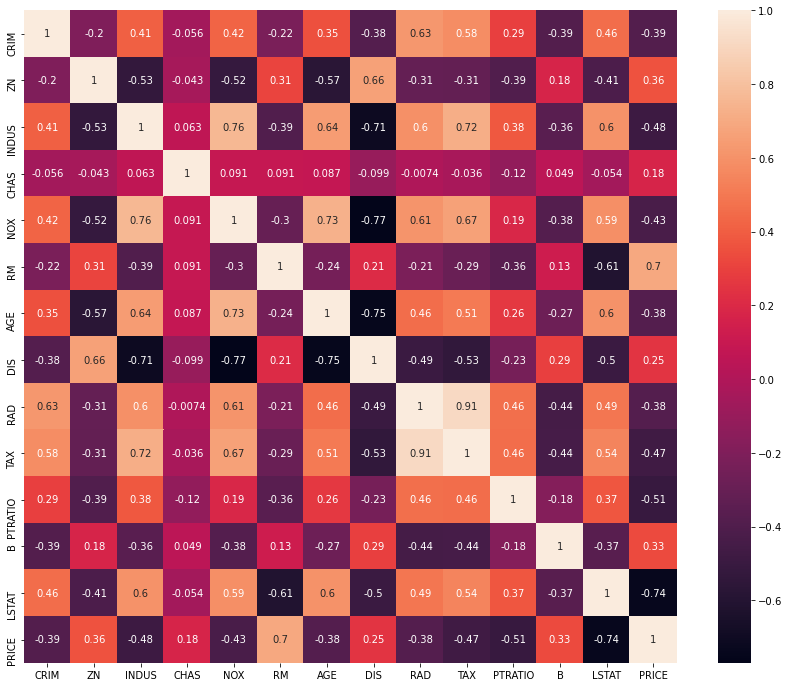

In [15]:
# plotting the heatmap
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

By looking at the correlation plot LSAT is negatively correlated with -0.75 and RM is positively correlated to the price and PTRATIO is correlated negatively with -0.51

<a id = 'split'></a>
### Splitting the dependent feature and independent feature 

In [16]:
#X = data[['LSTAT','RM','PTRATIO']]
X = data.iloc[:,:-1]
y= data.PRICE

<a id = 'valid'></a>
### Splitting the data for Model Validation 

In [17]:
# Splitting the data into train and test for building the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

<a id  = 'NN'></a>
## Neural Networks

In [18]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
#Creating the neural network model
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [20]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 565.8471
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 508.2584
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 372.1116
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 148.9449
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 62.1975
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 37.2017
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 28.2180
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 24.5292
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 21.7771
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 19.9602
Epoch 11/100
13/13 [==============================] - 0s 2ms/step - loss: 18.6219
Epoch 12/100
13/13 [==============================] - 0s 2ms/step - loss: 17.1932
Epoch 13/100
13/13 [=

<a id = 'eval'></a>
### Evaluation of the model

In [21]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9035683109636379


In [23]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

2.9929024033660965
